## Se importan las librerías que se utilizarán

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
plt.style.use('ggplot')

In [23]:
df = pd.read_parquet(r"C:\Users\Sofita\Documents\Henry\Movies\merged_data_model.parquet")

In [24]:
data = df.copy()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37263 entries, 0 to 37262
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   budget                     37263 non-null  int64         
 1   id                         37263 non-null  int64         
 2   overview                   36611 non-null  object        
 3   popularity                 37263 non-null  float64       
 4   release_date               37263 non-null  datetime64[ns]
 5   revenue                    37263 non-null  float64       
 6   title                      37263 non-null  object        
 7   vote_average               37263 non-null  float64       
 8   vote_count                 37263 non-null  float64       
 9   genres_name                37263 non-null  object        
 10  production_companies_name  37263 non-null  object        
 11  production_countries_name  37263 non-null  object        
 12  rele

# Distribución de variables numéricas
Se crean histogramas y boxplots para analizar la distribucion de las variables numéricas.
El propósito es identificar outliers y comprender la dispersión de cada métrica.

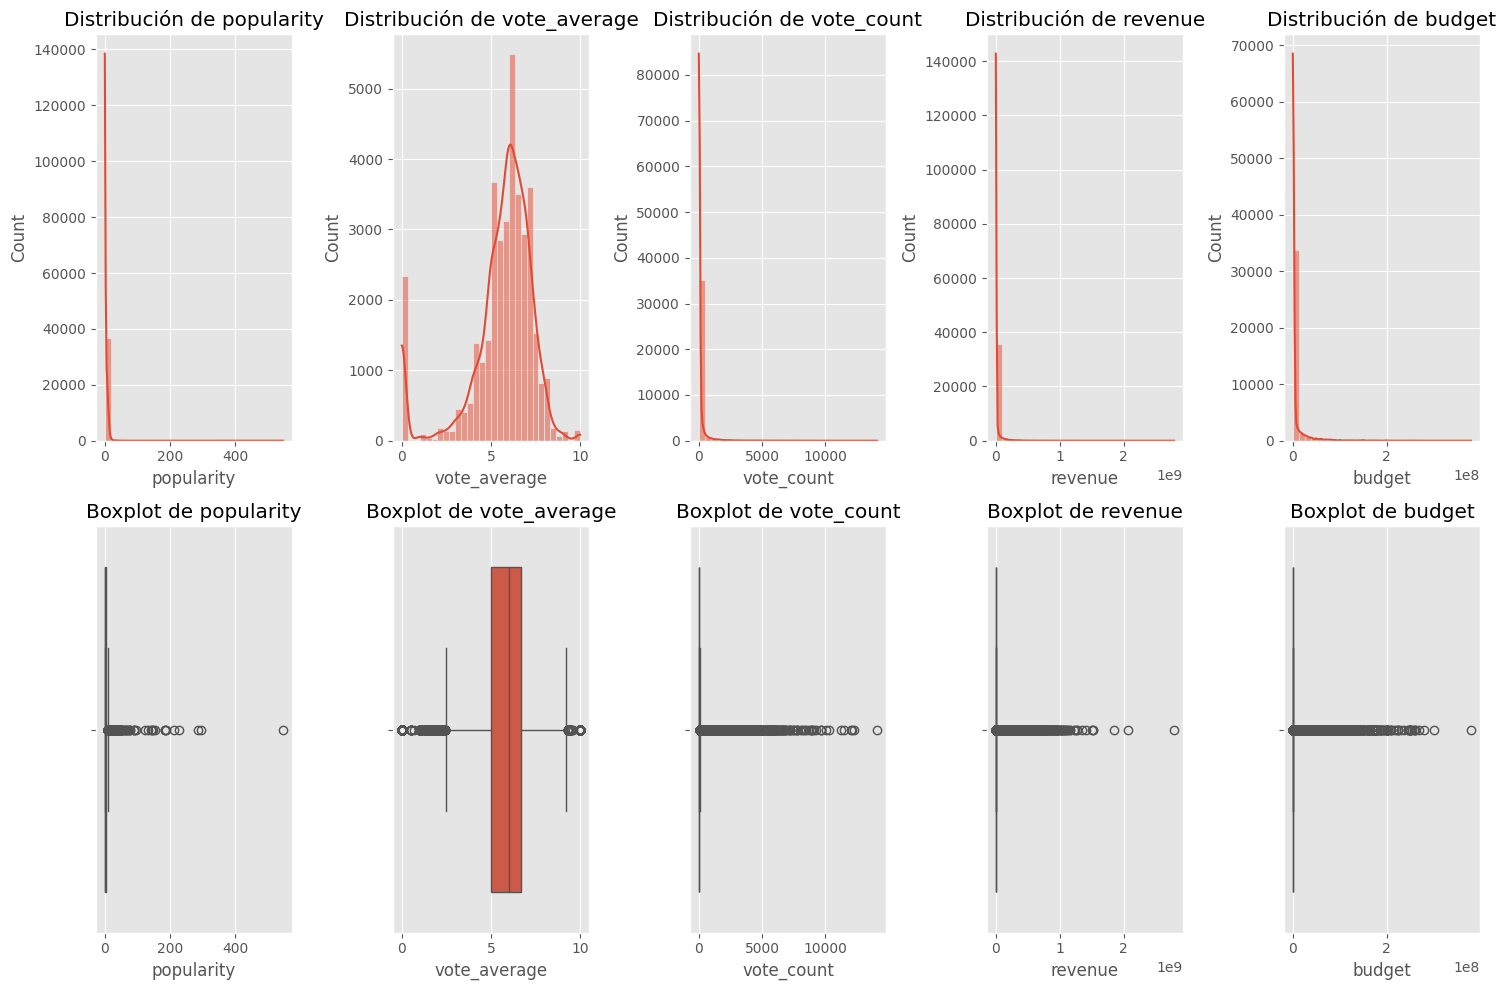

In [ ]:
# Lista de variables numéricas a visualizar
numeric_vars = ['popularity', 'vote_average', 'vote_count', 'revenue', 'budget']

# Configuración general de gráficos
plt.figure(figsize=(15, 10))

# Crear gráficos
for i, var in enumerate(numeric_vars):
    plt.subplot(2, len(numeric_vars), i + 1)
    sns.histplot(data[var], bins=30, kde=True)
    plt.title(f'Distribución de {var}')
    
    plt.subplot(2, len(numeric_vars), i + len(numeric_vars) + 1)
    sns.boxplot(x=data[var])
    plt.title(f'Boxplot de {var}')
    
plt.tight_layout()
plt.show()


# Relaciones entre variables
Visualizamos cómo  la popularidad y la puntuación promedio de las películas se relacionan con los ingresos en los gráficos de dispersión y buscamos patrones relacionales en el heatmap.

Con base en la popularidad vs el género, se decide filtrar las peliculas cuyo genero tienen popularidad menor o igual a 4

In [ ]:
# Convertimos el campo de género en filas separadas para cada género
data_exploded = data.assign(genres_name=data['genres_name'].str.split(',')).explode('genres_name')

# Configuración del tamaño de la figura para los gráficos
plt.figure(figsize=(20, 5))

# Popularidad vs. Ingresos
plt.subplot(1, 4, 1)
sns.scatterplot(x='popularity', y='revenue', data=data)
plt.title('Popularidad vs. Ingresos')

# Puntuación promedio vs. Ingresos
plt.subplot(1, 4, 2)
sns.scatterplot(x='vote_average', y='revenue', data=data)
plt.title('Puntuación Promedio vs. Ingresos')

# Presupuesto vs. Retorno de Inversión
plt.subplot(1, 4, 3)
sns.scatterplot(x='budget', y='return', data=data)
plt.title('Presupuesto vs. Retorno')

# Popularidad promedio por Género (Popularidad vs. Género)
plt.subplot(1, 4, 4)
sns.barplot(x='popularity', y='genres_name', data=data_exploded, estimator='mean')
plt.title('Popularidad Promedio por Género')

plt.tight_layout()
plt.show()


## Correlación entre presupuesto e ingresos, popularidad y cantidad de votos

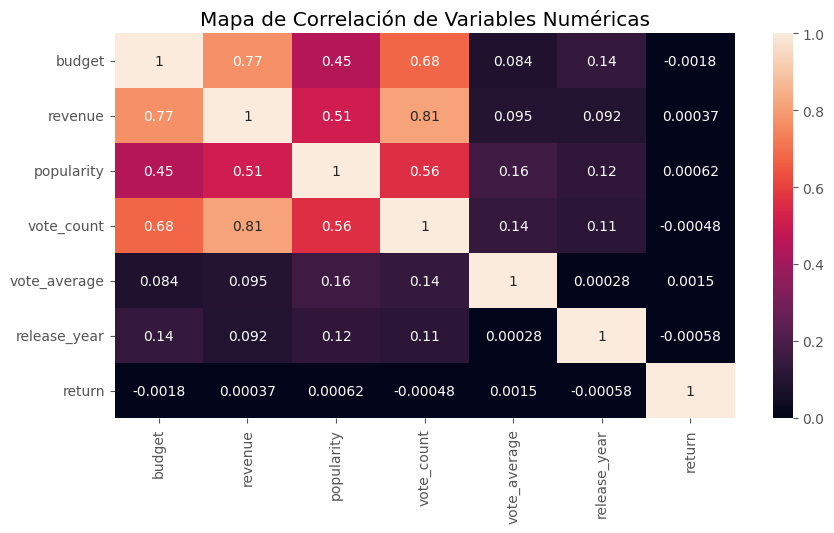

In [29]:
plt.figure(figsize=(10, 5))
sns.heatmap(data[['budget', 'revenue', 'popularity', 'vote_count', 'vote_average', 'release_year', 'return']].corr(), annot=True)
plt.title('Mapa de Correlación de Variables Numéricas')
plt.show()


Se observa que la mayor correlación se da entre la cantidad de votos y el retorno de cada película.

# Análisis de frecuencia para géneros y compañias
Desanidamos las listas usando el método explode() para acceder a los elementos individuales de las columnas 'genres_name' y 'production_companies_name'

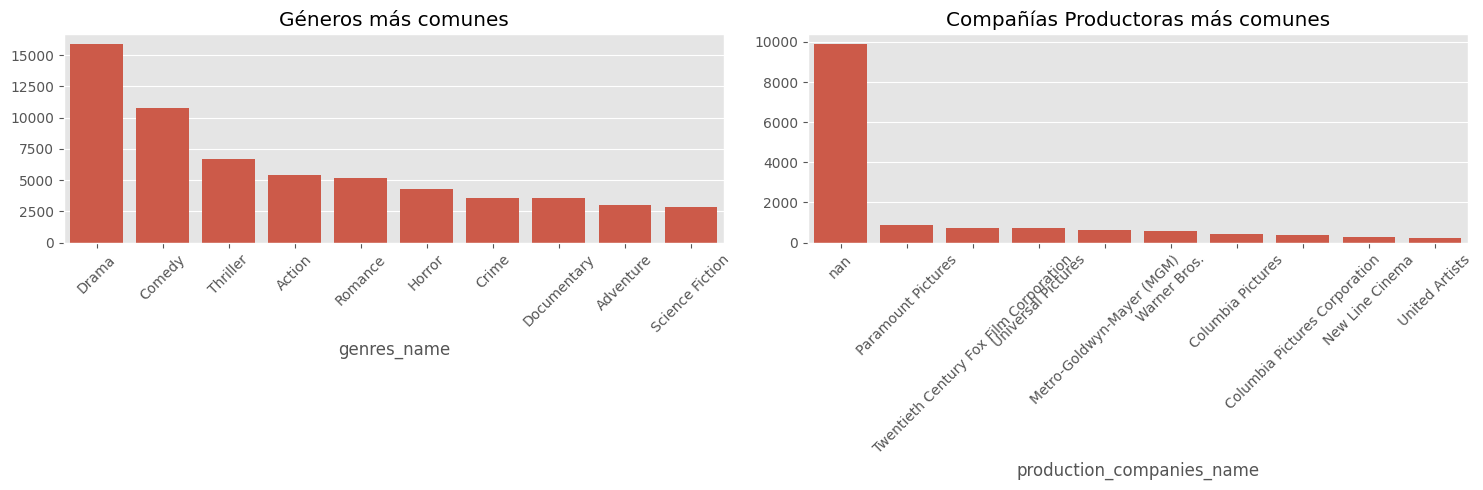

In [30]:
# Conteo de géneros y compañías más comunes
from collections import Counter

# Procesar las listas de géneros y compañías para visualización
genres_list = data['genres_name'].explode()
companies_list = data['production_companies_name'].explode()

plt.figure(figsize=(15, 5))

# Gráfico de géneros
plt.subplot(1, 2, 1)
sns.barplot(x=genres_list.value_counts().head(10).index, y=genres_list.value_counts().head(10).values)
plt.title('Géneros más comunes')
plt.xticks(rotation=45)

# Gráfico de compañías
plt.subplot(1, 2, 2)
sns.barplot(x=companies_list.value_counts().head(10).index, y=companies_list.value_counts().head(10).values)
plt.title('Compañías Productoras más comunes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


# Años con mayor estreno de películas

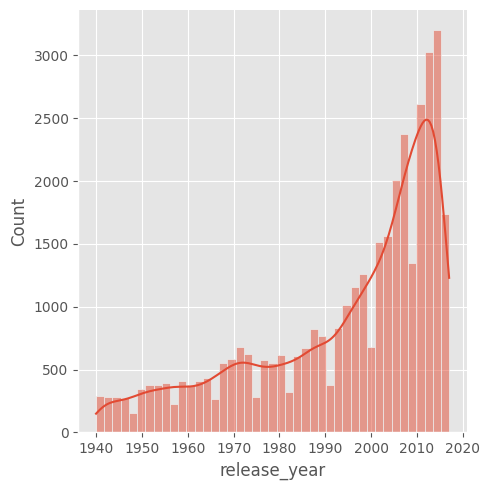

In [31]:
sns.displot(data=data, x=data['release_year'], kde=True)

En base a este gráfico, se elige filtrar las películas estrenadas a partir del año 2000

## Top ten años con mayor estrenos de películas

Text(0.5, 0, 'Cantidad')

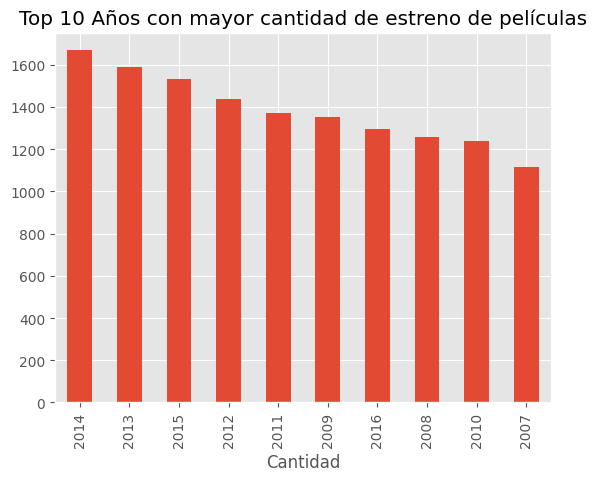

In [32]:
ax  = data['release_year'].value_counts().head(10) \
      .plot(kind='bar', title= 'Top 10 Años con mayor cantidad de estreno de películas')
ax.set_xlabel('Año de lanzamiento')
ax.set_xlabel('Cantidad')

# Análisis de frecuencia de países de producción
Los países de producción más comunes pueden influir en la preferencia de los usuarios.

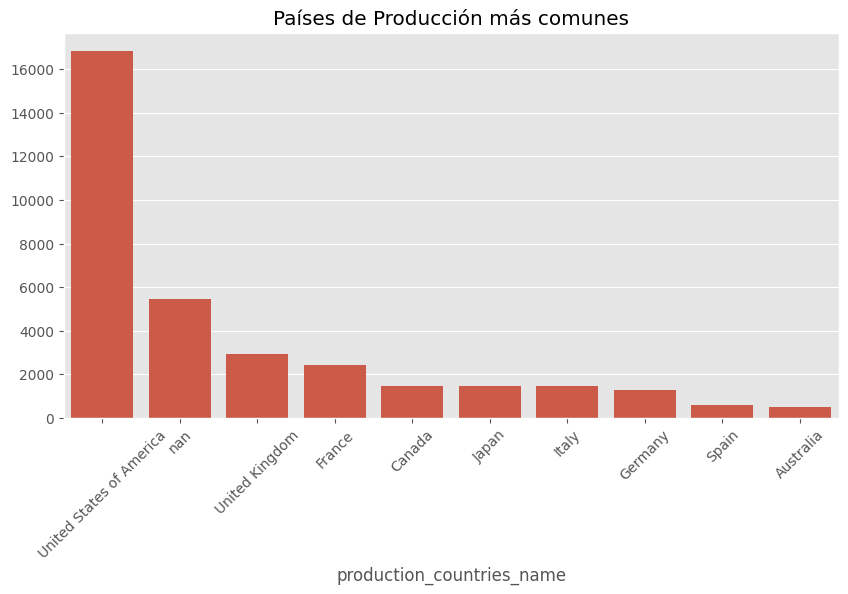

In [33]:
# Conteo de países más comunes
countries_list = data['production_countries_name'].explode()

plt.figure(figsize=(10, 5))
sns.barplot(x=countries_list.value_counts().head(10).index, y=countries_list.value_counts().head(10).values)
plt.title('Países de Producción más comunes')
plt.xticks(rotation=45)
plt.show()


# Películas con mayor y menor presupuesto

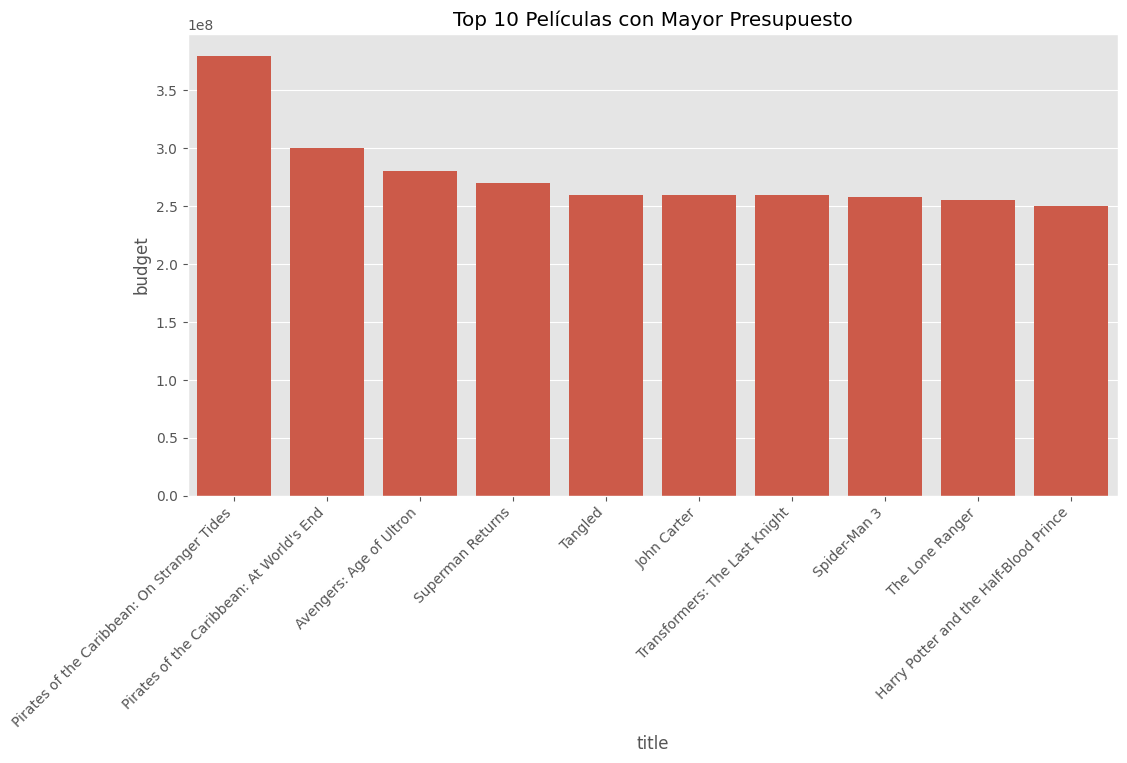

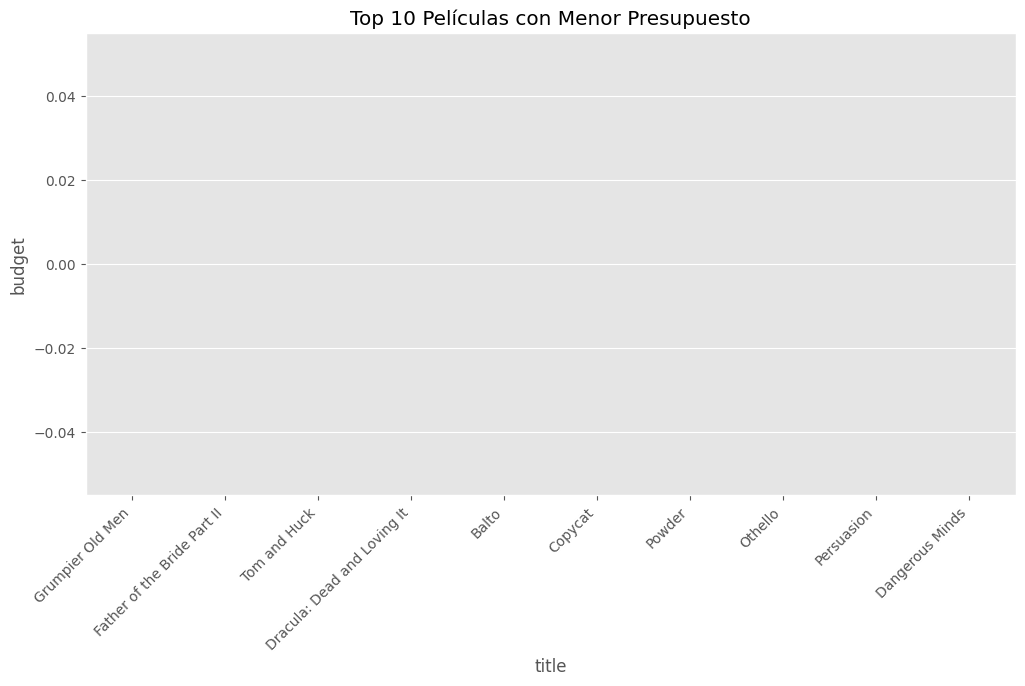

In [34]:
# Selecciona el top y bottom 10 de películas por presupuesto
top_10_budget = data.nlargest(10, 'budget')
bottom_10_budget = data.nsmallest(10, 'budget')

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='budget', data=top_10_budget)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Películas con Mayor Presupuesto')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='title', y='budget', data=bottom_10_budget)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Películas con Menor Presupuesto')
plt.show()

# Productoras con el mayor número de películas

In [35]:
top_production_companies = data['production_companies_name'].value_counts().head(10)

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(x=top_production_companies.index, y=top_production_companies.values)
plt.xticks(rotation=45, ha='right')
plt.title('Productoras con Más Películas')
plt.xlabel('Productora')
plt.ylabel('Número de Películas')
plt.show()


TypeError: unhashable type: 'numpy.ndarray'

<Figure size 1200x600 with 0 Axes>

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='budget', y='return', hue='production_companies_name', data=data, alpha=0.6, legend=False)
plt.title('Presupuesto vs Retorno de Inversión por Productora')
plt.xlabel('Presupuesto')
plt.ylabel('Retorno de Inversión')
plt.show()

# Nube de palabras
Usando la clase WorldCloud se genera una visualización basada en la frecuencia de palabras en los títulos y las sinopsis. 

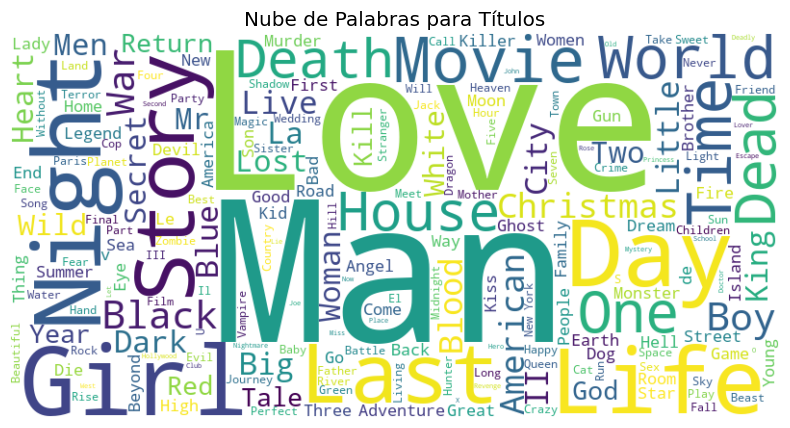

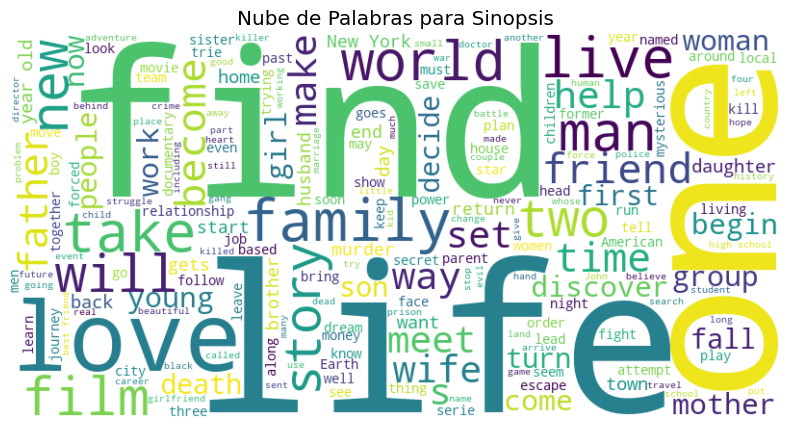

In [ ]:
# Crear texto único para la nube de palabras
title_text = " ".join(data['title'].dropna().astype(str))
overview_text = " ".join(data['overview'].dropna().astype(str))

# Crear nube de palabras para títulos
wordcloud_title = WordCloud(width=800, height=400, background_color='white').generate(title_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_title, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Títulos')
plt.show()

# Crear nube de palabras para sinopsis
wordcloud_overview = WordCloud(width=800, height=400, background_color='white').generate(overview_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_overview, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras para Sinopsis')
plt.show()